<a href="https://colab.research.google.com/github/ybaris/DATA-690-WANG/blob/master/Project_Deliverable_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Proposal

1,2,3) I have been always interested in different kinds of sports and statistics about them. I have been watching games and checking historical stats and analysis all the time. Since I found out that there are numerious different data I wanted to dig in more into them. For this project I would like to work on men's tennis data. I found all ATP games' records for each year starting from 1968 to today. I would like to analyse the winning percetanges depending on first set winner. I would like to see the results for different surfaces and tournaments for the last couple of years. (Probably last 5 years) I would like to see which players have the most winning percentage after winning the first set. As a well known fact, winning the first set gives the player an important mental advantage and it reflects to his/her game. That is my curiosity and I find it useful if it really has an effect on players' performances.

4) I found an open source data from github as you can see the link here: https://github.com/JeffSackmann/tennis_atp I tried to read the files on this colab file but I am not sure if I am doing it right. I would like to discuss with you on this.

5) I would like to analyze the tournament which have more than 32 players in the draw. I am planning to avoid smaller tournaments or the national competitions, because I would like to focus more on the individual performances. I would like to analyze 1 year first and depending on the process I would like to work on different years of ATP data.

6) I will check the winning percentage of players after winning the first set. I would like to see if there are certain players who are more successful on this or if someone is worse. Another thing I would like to check is the Grand Slam tournaments as the biggest competition in this sport. I would like to see if the results have a significant difference in general and in these tournaments.

7) I will use statistics very often in this analysis and I would like to put the results in charts. I believe showing the differences between surfaces and tournaments will be useful. I would like show the most successful players on a chart as well.

## Project 2 Deliverable: 
On this project I analyzed if winning the first set has a significant effect on winning the match in tennis. I anaylized men's tennis 2017 ATP data. I would like to see which players have the best rates on this and if there are major differences between different surfaces. 

Data set link: https://github.com/JeffSackmann/tennis_atp

License
Creative Commons License
Tennis databases, files, and algorithms by Jeff Sackmann / Tennis Abstract is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.
Based on a work at https://github.com/JeffSackmann.

In other words: Attribution is required. Non-commercial use only.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [26]:
df = pd.read_csv("/content/atp_matches_2017.csv")
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2017-M020,Brisbane,Hard,32,A,20170102,271,104678,NaN,NaN,Viktor Troicki,R,193.0,SRB,30.893908,106415,NaN,Q,Yoshihito Nishioka,L,NaN,JPN,21.267625,6-4 7-5,3,R32,91.0,11.0,5.0,64.0,45.0,35.0,6.0,11.0,1.0,3.0,0.0,1.0,82.0,53.0,33.0,13.0,11.0,6.0,10.0,29.0,1385.0,100.0,604.0
1,2017-M020,Brisbane,Hard,32,A,20170102,272,106378,NaN,NaN,Kyle Edmund,R,NaN,GBR,21.984942,124014,NaN,Q,Ernesto Escobedo,R,NaN,USA,20.498289,7-6(4) 7-6(6),3,R32,130.0,11.0,2.0,83.0,48.0,37.0,19.0,12.0,2.0,3.0,11.0,3.0,113.0,67.0,39.0,27.0,12.0,9.0,10.0,45.0,1001.0,141.0,443.0
2,2017-M020,Brisbane,Hard,32,A,20170102,273,106298,6.0,NaN,Lucas Pouille,R,185.0,FRA,22.858316,104468,NaN,NaN,Gilles Simon,R,183.0,FRA,32.016427,7-6(6) 7-6(4),3,R32,125.0,7.0,2.0,102.0,52.0,37.0,24.0,12.0,8.0,12.0,1.0,4.0,76.0,42.0,29.0,16.0,12.0,0.0,4.0,15.0,2156.0,25.0,1585.0
3,2017-M020,Brisbane,Hard,32,A,20170102,275,111577,NaN,Q,Jared Donaldson,R,NaN,USA,20.232717,104180,NaN,NaN,Gilles Muller,L,193.0,LUX,33.653662,6-4 6-4,3,R32,75.0,12.0,2.0,55.0,33.0,27.0,13.0,10.0,0.0,1.0,10.0,2.0,58.0,37.0,27.0,7.0,10.0,2.0,5.0,105.0,570.0,34.0,1255.0
4,2017-M020,Brisbane,Hard,32,A,20170102,276,111442,NaN,WC,Jordan Thompson,R,NaN,AUS,22.704997,111200,NaN,WC,Elias Ymer,R,NaN,SWE,20.731006,6-3 6-2,3,R32,90.0,1.0,0.0,46.0,28.0,26.0,6.0,8.0,1.0,2.0,1.0,6.0,74.0,43.0,23.0,13.0,9.0,10.0,15.0,79.0,689.0,160.0,372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6.0,NaN,Grigor Dimitrov,R,188.0,BUL,26.496920,105676,7.0,NaN,David Goffin,R,163.0,BEL,26.934976,7-5 4-6 6-3,3,F,150.0,5.0,6.0,103.0,67.0,47.0,18.0,16.0,7.0,10.0,10.0,5.0,107.0,54.0,42.0,22.0,15.0,11.0,15.0,6.0,3650.0,8.0,2975.0
2882,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NaN,NaN,David Goffin,R,163.0,BEL,26.954141,106298,NaN,NaN,Lucas Pouille,R,185.0,FRA,23.739904,7-5 6-3 6-1,3,RR,119.0,12.0,0.0,74.0,48.0,40.0,17.0,14.0,0.0,0.0,6.0,2.0,95.0,53.0,33.0,21.0,14.0,6.0,11.0,7.0,3775.0,18.0,2235.0
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NaN,NaN,Jo-Wilfried Tsonga,R,188.0,FRA,32.594114,104327,NaN,NaN,Steve Darcis,R,178.0,BEL,33.689254,6-3 6-2 6-1,5,RR,106.0,12.0,2.0,64.0,33.0,31.0,19.0,12.0,0.0,0.0,1.0,2.0,81.0,54.0,30.0,12.0,12.0,5.0,11.0,15.0,2320.0,76.0,667.0
2884,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NaN,NaN,David Goffin,R,163.0,BEL,26.954141,104542,NaN,NaN,Jo-Wilfried Tsonga,R,188.0,FRA,32.594114,7-6(5) 6-3 6-2,3,RR,164.0,1.0,0.0,122.0,71.0,47.0,33.0,15.0,10.0,10.0,10.0,3.0,88.0,54.0,44.0,13.0,14.0,7.0,10.0,7.0,3775.0,15.0,2320.0


In [27]:
df.shape

(2886, 49)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2886 non-null   object 
 1   tourney_name        2886 non-null   object 
 2   surface             2806 non-null   object 
 3   draw_size           2886 non-null   int64  
 4   tourney_level       2886 non-null   object 
 5   tourney_date        2886 non-null   int64  
 6   match_num           2886 non-null   int64  
 7   winner_id           2886 non-null   int64  
 8   winner_seed         1222 non-null   float64
 9   winner_entry        366 non-null    object 
 10  winner_name         2886 non-null   object 
 11  winner_hand         2884 non-null   object 
 12  winner_ht           2289 non-null   float64
 13  winner_ioc          2886 non-null   object 
 14  winner_age          2886 non-null   float64
 15  loser_id            2886 non-null   int64  
 16  loser_

### Column Name Explanation

* Many of the columns in the 'matches' files are self-explanatory, or are very similar to previous columns.

tourney_id
- a unique identifier for each tournament, such as 2020-888. The exact formats are borrowed from several different sources, so while the first four characters are always the year, the rest of the ID doesn't follow a predictable structure.

tourney_name
surface
draw_size
- number of players in the draw, often rounded up to the nearest power of 2. (For instance, a tournament with 28 players may be shown as 32.)

tourney_level
- For men: 'G' = Grand Slams, 'M' = Masters 1000s, 'A' = other tour-level events, 'C' = Challengers, 'S' = Satellites/ITFs, 'F' = Tour finals and other season-ending events, and 'D' = Davis Cup

tourney_date
- eight digits, YYYYMMDD, usually the Monday of the tournament week.

match_num
- a match-specific identifier. Often starting from 1, sometimes counting down from 300, and sometimes arbitrary. 

winner_id
- the player_id used in this repo for the winner of the match

winner_seed
winner_entry
- 'WC' = wild card, 'Q' = qualifier, 'LL' = lucky loser, 'PR' = protected ranking, 'ITF' = ITF entry, and there are a few others that are occasionally used.

winner_name
winner_hand
winner_ht
- height in centimeters, where available

winner_ioc
- three-character country code

winner_age
- age, in years, as of the tourney_date

loser_id
loser_seed
loser_entry
loser_name
loser_hand
loser_ht
loser_ioc
loser_age
score
best_of
- '3' or '5', indicating the the number of sets for this match

round
minutes
- match length, where available

- w_ace: winner's number of aces
- w_df: winner's number of doubles faults
- w_svpt: winner's number of serve points
- w_1stIn: winner's number of first serves made
- w_1stWon: winner's number of first-serve points won
- w_2ndWon: winner's number of second-serve points won
- w_SvGms: winner's number of serve games
- w_bpSaved: winner's number of break points saved
- w_bpFaced: winner's number of break points faced

l_ace
l_df
l_svpt
l_1stIn
l_1stWon
l_2ndWon
l_SvGms
l_bpSaved
l_bpFaced

winner_rank
- winner's ATP or WTA rank, as of the tourney_date, or the most recent ranking date before the tourney_date
winner_rank_points
- number of ranking points, where available
loser_rank
loser_rank_points

Resource: https://github.com/JeffSackmann/tennis_atp/blob/master/matches_data_dictionary.txt

### Cleansing the data

In [29]:
# getting desired columns from the big data frame
data = pd.DataFrame()
data = df[['tourney_name', 'tourney_level', 'surface', 'draw_size', 'winner_name', 'winner_hand', 'score', 'best_of', 'round', 'loser_name']]
data

,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name
0,Brisbane,A,Hard,32,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka
1,Brisbane,A,Hard,32,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo
2,Brisbane,A,Hard,32,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon
3,Brisbane,A,Hard,32,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller
4,Brisbane,A,Hard,32,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer
...,...,...,...,...,...,...,...,...,...,...
2881,Tour Finals,F,Hard,8,Grigor Dimitrov,R,7-5 4-6 6-3,3,F,David Goffin
2882,Davis Cup WG F: BEL vs FRA,D,Hard,4,David Goffin,R,7-5 6-3 6-1,3,RR,Lucas Pouille
2883,Davis Cup WG F: BEL vs FRA,D,Hard,4,Jo-Wilfried Tsonga,R,6-3 6-2 6-1,5,RR,Steve Darcis
2884,Davis Cup WG F: BEL vs FRA,D,Hard,4,David Goffin,R,7-6(5) 6-3 6-2,3,RR,Jo-Wilfried Tsonga


In [30]:
data['tourney_name'].nunique()

133

In [31]:
# removing the lines without a valid score. 
data = data[data['score'] != "W/O"]

In [32]:
# removing the lines without a valid score or walkovers
data = data[data['score'] != "Walkover"]

In [33]:
# I would like to analyze the tournaments which has at least 32 players in their draw
data32 = data[data['draw_size'] >= 32]
data32

,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name
0,Brisbane,A,Hard,32,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka
1,Brisbane,A,Hard,32,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo
2,Brisbane,A,Hard,32,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon
3,Brisbane,A,Hard,32,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller
4,Brisbane,A,Hard,32,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer
...,...,...,...,...,...,...,...,...,...,...
2861,Paris Masters,M,Hard,64,Julien Benneteau,R,7-6(5) 7-5,3,QF,Marin Cilic
2862,Paris Masters,M,Hard,64,John Isner,R,6-4 6-7(5) 6-4,3,QF,Juan Martin del Potro
2864,Paris Masters,M,Hard,64,Jack Sock,R,7-5 6-2,3,SF,Julien Benneteau
2865,Paris Masters,M,Hard,64,Filip Krajinovic,R,6-4 6-7(2) 7-6(5),3,SF,John Isner


In [34]:
# list all the tournaments in ATP which has a draw size equal or more than 32 players
print(data32["tourney_name"].nunique())
data32["tourney_name"].unique()

66


array(['Brisbane', 'Chennai', 'Doha', 'Auckland', 'Sydney',
       'Australian Open', 'Montpellier', 'Quito', 'Sofia', 'Buenos Aires',
       'Memphis', 'Rotterdam', 'Delray Beach', 'Marseille',
       'Rio de Janeiro', 'Acapulco', 'Dubai', 'Sao Paulo',
       'Indian Wells Masters', 'Miami Masters', 'Houston', 'Marrakech',
       'Monte Carlo Masters', 'Barcelona', 'Budapest', 'Estoril',
       'Istanbul', 'Munich', 'Madrid Masters', 'Rome Masters', 'Geneva',
       'Lyon', 'Roland Garros', 's Hertogenbosch', 'Stuttgart', 'Halle',
       "Queen's Club", 'Antalya', 'Eastbourne', 'Wimbledon', 'Bastad',
       'Newport', 'Umag', 'Atlanta', 'Gstaad', 'Hamburg', 'Kitzbuhel',
       'Los Cabos', 'Washington', 'Canada Masters', 'Cincinnati Masters',
       'Winston-Salem', 'US Open', 'Metz', 'St. Petersburg', 'Chengdu',
       'Shenzhen', 'Beijing', 'Tokyo', 'Shanghai Masters', 'Antwerp',
       'Moscow', 'Stockholm', 'Basel', 'Vienna', 'Paris Masters'],
      dtype=object)

### Surface Analysis

In [35]:
print(data32['surface'].nunique())
print(data32['surface'].unique())


3
['Hard' 'Clay' 'Grass']
Number of games on 'Hard' surface is: 1478
Number of games on 'Clay' surface is: 802
Number of games on 'Grass' surface is: 324


In [36]:
hard = data32[data32.surface == 'Hard'].shape[0]
clay =data32[data32.surface == 'Clay'].shape[0]
grass = data32[data32.surface == 'Grass'].shape[0]


Number of games on 'Hard' surface is: 1478
Number of games on 'Clay' surface is: 802
Number of games on 'Grass' surface is: 324


<BarContainer object of 3 artists>

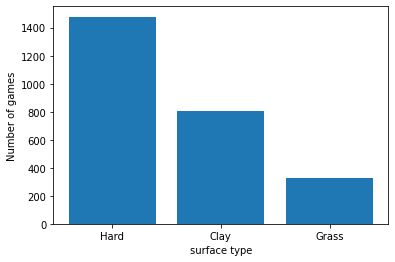

In [90]:
surfaces = ['Hard', 'Clay', 'Grass']
games = [hard, clay, grass]

print("Number of games on 'Hard' surface is:" , data32[data32.surface == 'Hard'].shape[0])
print("Number of games on 'Clay' surface is:" , data32[data32.surface == 'Clay'].shape[0])
print("Number of games on 'Grass' surface is:" , data32[data32.surface == 'Grass'].shape[0])

plt.xlabel('surface type')
plt.ylabel('Number of games')
plt.bar(surfaces, games)



### Player Analysis

In [38]:
print("There are", data32['winner_name'].nunique(), "different winners.")
winners32 = data32['winner_name'].value_counts() # displaying the number of matches each player won
winners32.head(10) # top 10 players per number of winning a match in 2017

There are 214 different winners.


Rafael Nadal             67
Alexander Zverev         53
David Goffin             50
Roger Federer            49
Dominic Thiem            46
Roberto Bautista Agut    46
Grigor Dimitrov          44
Marin Cilic              42
Juan Martin del Potro    38
Diego Schwartzman        38
Name: winner_name, dtype: int64

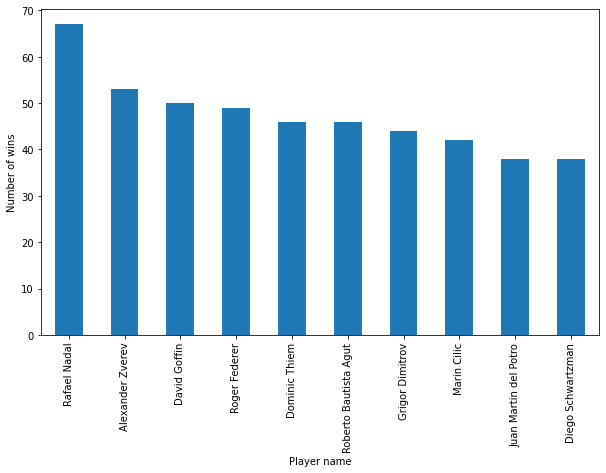

In [39]:
plt.ylabel('Number of wins')
plt.xlabel('Player name')
winners32.head(10).plot.bar(figsize=(10,6)) 


#### Player Analysis for Grand Slam Tournaments

In [40]:
data_grandslam = data[data['tourney_level'] == "G"] # creating new data frame only for grandslam tournaments
data_grandslam

,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name
139,Australian Open,G,Hard,128,Andy Murray,R,7-5 7-6(5) 6-2,5,R128,Illya Marchenko
140,Australian Open,G,Hard,128,Andrey Rublev,R,4-6 6-3 7-6(0) 6-3,5,R128,Yen Hsun Lu
141,Australian Open,G,Hard,128,Alex De Minaur,R,5-7 6-3 2-6 7-6(2) 6-1,5,R128,Gerald Melzer
142,Australian Open,G,Hard,128,Sam Querrey,R,6-7(10) 7-6(4) 6-3 6-4,5,R128,Quentin Halys
143,Australian Open,G,Hard,128,John Isner,R,6-3 6-4 6-7(5) 6-1,5,R128,Konstantin Kravchuk
...,...,...,...,...,...,...,...,...,...,...
2395,US Open,G,Hard,128,Kevin Anderson,R,7-6(5) 6-7(9) 6-3 7-6(7),5,QF,Sam Querrey
2396,US Open,G,Hard,128,Pablo Carreno Busta,R,6-4 6-4 6-2,5,QF,Diego Schwartzman
2397,US Open,G,Hard,128,Rafael Nadal,L,4-6 6-0 6-3 6-2,5,SF,Juan Martin del Potro
2398,US Open,G,Hard,128,Kevin Anderson,R,4-6 7-5 6-3 6-4,5,SF,Pablo Carreno Busta


In [41]:
gs_winners = data_grandslam['winner_name'].value_counts()
gs_winners

Rafael Nadal                23
Roger Federer               18
Dominic Thiem               14
Marin Cilic                 13
Andy Murray                 12
                            ..
Nicolas Almagro              1
Radek Stepanek               1
Adrian Menendez Maceiras     1
Cameron Norrie               1
Nicolas Kicker               1
Name: winner_name, Length: 127, dtype: int64

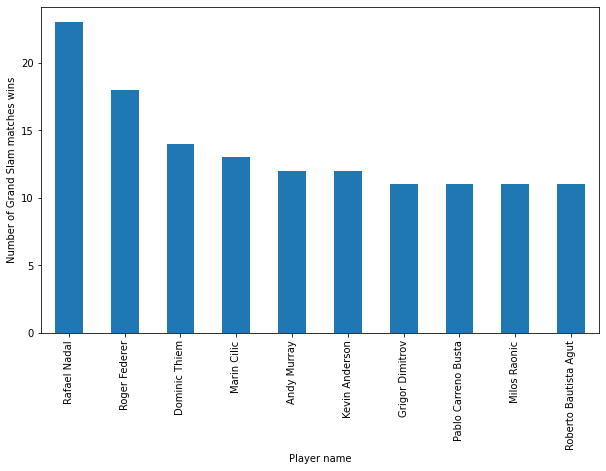

In [42]:
plt.ylabel('Number of Grand Slam matches wins')
plt.xlabel('Player name')
gs_winners.head(10).plot.bar(figsize=(10,6)) 

### First Set Winner and Match Winner

In [43]:
# displaying only score column
print(data32['score'])


0                 6-4 7-5
1           7-6(4) 7-6(6)
2           7-6(6) 7-6(4)
3                 6-4 6-4
4                 6-3 6-2
              ...        
2861           7-6(5) 7-5
2862       6-4 6-7(5) 6-4
2864              7-5 6-2
2865    6-4 6-7(2) 7-6(5)
2866          5-7 6-4 6-1
Name: score, Length: 2604, dtype: object


In [44]:
# displaying the first element of the pandas series in data32['score']
data32['score'][0]

'6-4 7-5'

In [45]:
# trying the evaluation for first set winner and match winner
for fset in data32['score'].head(10):
    print(fset)
    print(int(fset[0]) > int(fset[2]))

6-4 7-5
True
7-6(4) 7-6(6)
True
7-6(6) 7-6(4)
True
6-4 6-4
True
6-3 6-2
True
6-3 7-5
True
6-2 6-3
True
4-6 6-3 6-4
False
6-3 5-7 7-5
True
6-3 6-3
True


In [46]:
# I marked the matches won by first set winner as '1' and other matches as '0'
# And I added those values into a new list
set_and_match_winner32 = []
for fset in data32['score']:
    if int(fset[0]) > int(fset[2]):
        set_and_match_winner32.append(1)
    else:
        set_and_match_winner32.append(0)

len(set_and_match_winner32)

2604

In [47]:
# since both winner_ids and winner_names are unique we can remove ids from our dataframe
data32 = data32[['tourney_name', 'tourney_level', 'surface', 'draw_size', 'winner_name', 'winner_hand', 'score', 'best_of', 'round', 'loser_name']]
data32

,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name
0,Brisbane,A,Hard,32,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka
1,Brisbane,A,Hard,32,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo
2,Brisbane,A,Hard,32,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon
3,Brisbane,A,Hard,32,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller
4,Brisbane,A,Hard,32,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer
...,...,...,...,...,...,...,...,...,...,...
2861,Paris Masters,M,Hard,64,Julien Benneteau,R,7-6(5) 7-5,3,QF,Marin Cilic
2862,Paris Masters,M,Hard,64,John Isner,R,6-4 6-7(5) 6-4,3,QF,Juan Martin del Potro
2864,Paris Masters,M,Hard,64,Jack Sock,R,7-5 6-2,3,SF,Julien Benneteau
2865,Paris Masters,M,Hard,64,Filip Krajinovic,R,6-4 6-7(2) 7-6(5),3,SF,John Isner


In [48]:
# adding the new list into our dataframe
data32['set_and_match_winner32'] = set_and_match_winner32
data32

,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name,set_and_match_winner32
0,Brisbane,A,Hard,32,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka,1
1,Brisbane,A,Hard,32,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo,1
2,Brisbane,A,Hard,32,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon,1
3,Brisbane,A,Hard,32,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller,1
4,Brisbane,A,Hard,32,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer,1
...,...,...,...,...,...,...,...,...,...,...,...
2861,Paris Masters,M,Hard,64,Julien Benneteau,R,7-6(5) 7-5,3,QF,Marin Cilic,1
2862,Paris Masters,M,Hard,64,John Isner,R,6-4 6-7(5) 6-4,3,QF,Juan Martin del Potro,1
2864,Paris Masters,M,Hard,64,Jack Sock,R,7-5 6-2,3,SF,Julien Benneteau,1
2865,Paris Masters,M,Hard,64,Filip Krajinovic,R,6-4 6-7(2) 7-6(5),3,SF,John Isner,1


In [49]:
data32['score'][0].split()[0] # just a display for myself

'6-4'

In [50]:
print(data32['score'].nunique())
data32['score'].unique()

1136


array(['6-4 7-5', '7-6(4) 7-6(6)', '7-6(6) 7-6(4)', ..., '6-3 6-7(5) 6-3',
       '6-4 6-7(2) 7-6(5)', '5-7 6-4 6-1'], dtype=object)

- So far I cleansed my data set and used the columns we wanted. After that with for loop and if statements in the above cells, I was able to create another column which shows if the first set winner won the match or not. Below I counted the number of 1's and 0's, so I can calculate the percentage of winning a game after winning the first set. 

- PS: Please keep in mind that this data set is only for ATP Single's and tournaments with draw size 32 player or more are taken into consideration.

In [51]:
# number of 1's is the number of matches won by the first set winner
# number of 0's is the number of matches won by the first set winner

data32['set_and_match_winner32'].value_counts()

1    2082
0     522
Name: set_and_match_winner32, dtype: int64

In [52]:
print("The percentage of winning the match after winning the first set is:\n", data32['set_and_match_winner32'].value_counts(1)[1])

The percentage of winning the match after winning the first set is:
 0.7995391705069125


### Creating another column for the whole ATP 2017 data. 
I checked all the tournaments which had at least 8 players in their draw size. 
I added another column and checked the ratio of first set winner and match winner. 

In [53]:
set_and_match_winner = []
for fset in data['score']:
    if int(fset[0]) > int(fset[2]):
        set_and_match_winner.append(1)
    else:
        set_and_match_winner.append(0)

len(set_and_match_winner)

2868

In [54]:
data['set_and_match_winner'] = set_and_match_winner

In [55]:
print(data['score'].nunique())
print(data['score'].unique())

1278
['6-4 7-5' '7-6(4) 7-6(6)' '7-6(6) 7-6(4)' ... '7-6(6) 5-7 6-1'
 '4-6 6-0 6-3' '6-3 6-1 6-0']


In [56]:
data['surface'].unique()

array(['Hard', nan, 'Clay', 'Grass'], dtype=object)

In [57]:
data['surface'].value_counts()

Hard     1606
Clay      855
Grass     328
Name: surface, dtype: int64

In [58]:
n = data[data['draw_size'] >= 8]
n

,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name,set_and_match_winner
0,Brisbane,A,Hard,32,Viktor Troicki,R,6-4 7-5,3,R32,Yoshihito Nishioka,1
1,Brisbane,A,Hard,32,Kyle Edmund,R,7-6(4) 7-6(6),3,R32,Ernesto Escobedo,1
2,Brisbane,A,Hard,32,Lucas Pouille,R,7-6(6) 7-6(4),3,R32,Gilles Simon,1
3,Brisbane,A,Hard,32,Jared Donaldson,R,6-4 6-4,3,R32,Gilles Muller,1
4,Brisbane,A,Hard,32,Jordan Thompson,R,6-3 6-2,3,R32,Elias Ymer,1
...,...,...,...,...,...,...,...,...,...,...,...
2877,Tour Finals,F,Hard,8,Grigor Dimitrov,R,6-1 6-1,3,RR,Pablo Carreno Busta,1
2878,Tour Finals,F,Hard,8,Dominic Thiem,R,6-3 3-6 6-4,3,RR,Pablo Carreno Busta,1
2879,Tour Finals,F,Hard,8,David Goffin,R,2-6 6-3 6-4,3,SF,Roger Federer,0
2880,Tour Finals,F,Hard,8,Grigor Dimitrov,R,4-6 6-0 6-3,3,SF,Jack Sock,0


In [59]:
data['set_and_match_winner'].value_counts(1)

1    0.796722
0    0.203278
Name: set_and_match_winner, dtype: float64

In [60]:
data['set_and_match_winner'].value_counts()

1    2285
0     583
Name: set_and_match_winner, dtype: int64

### Now let's check this percentage for **Grand Slam** tournaments in 2017

In [61]:
gs_data = data[data['tourney_level'] == "G"]
gs_data

,tourney_name,tourney_level,surface,draw_size,winner_name,winner_hand,score,best_of,round,loser_name,set_and_match_winner
139,Australian Open,G,Hard,128,Andy Murray,R,7-5 7-6(5) 6-2,5,R128,Illya Marchenko,1
140,Australian Open,G,Hard,128,Andrey Rublev,R,4-6 6-3 7-6(0) 6-3,5,R128,Yen Hsun Lu,0
141,Australian Open,G,Hard,128,Alex De Minaur,R,5-7 6-3 2-6 7-6(2) 6-1,5,R128,Gerald Melzer,0
142,Australian Open,G,Hard,128,Sam Querrey,R,6-7(10) 7-6(4) 6-3 6-4,5,R128,Quentin Halys,0
143,Australian Open,G,Hard,128,John Isner,R,6-3 6-4 6-7(5) 6-1,5,R128,Konstantin Kravchuk,1
...,...,...,...,...,...,...,...,...,...,...,...
2395,US Open,G,Hard,128,Kevin Anderson,R,7-6(5) 6-7(9) 6-3 7-6(7),5,QF,Sam Querrey,1
2396,US Open,G,Hard,128,Pablo Carreno Busta,R,6-4 6-4 6-2,5,QF,Diego Schwartzman,1
2397,US Open,G,Hard,128,Rafael Nadal,L,4-6 6-0 6-3 6-2,5,SF,Juan Martin del Potro,0
2398,US Open,G,Hard,128,Kevin Anderson,R,4-6 7-5 6-3 6-4,5,SF,Pablo Carreno Busta,0


In [62]:
gs_data['set_and_match_winner'].value_counts()

1    403
0    105
Name: set_and_match_winner, dtype: int64

In [63]:
print("The percentage of winning the match after winning the first set in Grand Slam tournaments is:\n",gs_data['set_and_match_winner'].value_counts(1)[1])

The percentage of winning the match after winning the first set in Grand Slam tournaments is:
 0.7933070866141733


# Goals for the deliverable 3:
- I am planning to analyze the players with highest first set and match winning ratio. 
- I will analyze if there are significant differences between different surfaces. 
- I am planning to cleanse the things I did above and put them in a function, so I can analyze more years of ATP Singles data. I would like to analyze last 10 years data if the csv format is eligible.  

### Player Analysis for 2017 ATP

In [64]:
print("There are", data['winner_name'].nunique(), "different winners.")
winners = data['winner_name'].value_counts() # displaying the number of matches each player won
winners.head(10) # top 10 players per number of winning a match in 2017

There are 284 different winners.


Rafael Nadal             67
David Goffin             59
Alexander Zverev         55
Roger Federer            52
Grigor Dimitrov          49
Roberto Bautista Agut    48
Dominic Thiem            47
Marin Cilic              44
Diego Schwartzman        39
Jack Sock                38
Name: winner_name, dtype: int64

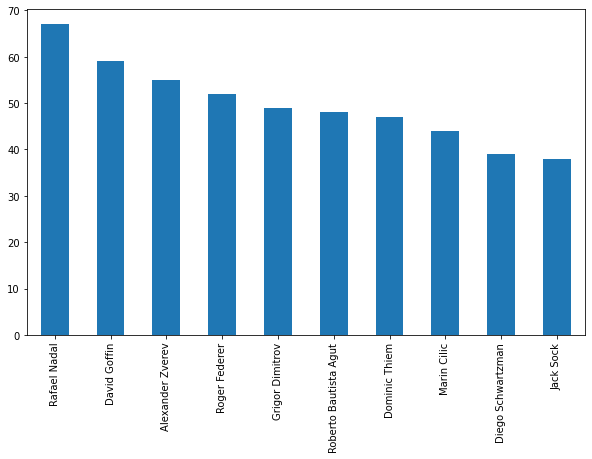

In [65]:
winners.head(10).plot.bar(figsize=(10,6))

In [67]:
len(data[data['winner_name'] == 'Roger Federer'])

52

In [92]:
# player analysis trial with Roger Federer
federer = pd.DataFrame()
federer['rate'] = np.where((data['winner_name'] == "Roger Federer") & (data['set_and_match_winner'] == 1)
                           , data['set_and_match_winner'], 0)
print("Federer's rate for match winning after winning the first set in 2017 is below: ")
federer.value_counts()[1] / len(data[data['winner_name'] == 'Roger Federer'])

Federer's rate for match winning after winning the first set in 2017 is below: 


rate
1       0.865385
dtype: float64

In [69]:
# displaying player analysis in a function, so we can use it for any player 
def player_analysis(player_name):
    pn = pd.DataFrame()
    pn['rate'] = np.where((data['winner_name'] == player_name) & (data['set_and_match_winner'] == 1)
                           , data['set_and_match_winner'], 0)
    print(player_name, (pn.value_counts()[1] / len(data[data['winner_name'] == player_name])))


In [70]:
player_analysis('Roger Federer')

Roger Federer rate
1       0.865385
dtype: float64


In [94]:
# I created a new list for top 10 player for 2017 ATP.  
top_players = ['Rafael Nadal', 'David Goffin', 'Alexander Zverev', 'Roger Federer', 'Grigor Dimitrov', 'Roberto Bautista Agut' ,
               'Dominic Thiem', 'Marin Cilic', 'Diego Schwartzman', 'Juan Martin del Potro']
# displaying top 10 players winning rate after winning the first set
print("Below you can see the ratio of the top 10 players who won the most number of matches in 2017: \n")
for player in top_players: 
    player_analysis(player)
    print('\n')

Below you can see the ratio of the top 10 players who won the most number of matches in 2017: 

Rafael Nadal rate
1       0.910448
dtype: float64


David Goffin rate
1       0.762712
dtype: float64


Alexander Zverev rate
1       0.836364
dtype: float64


Roger Federer rate
1       0.865385
dtype: float64


Grigor Dimitrov rate
1       0.857143
dtype: float64


Roberto Bautista Agut rate
1       0.875
dtype: float64


Dominic Thiem rate
1       0.87234
dtype: float64


Marin Cilic rate
1       0.886364
dtype: float64


Diego Schwartzman rate
1       0.871795
dtype: float64


Juan Martin del Potro rate
1       0.842105
dtype: float64




### Surface Analysis for ATP 2017

In [72]:
len(data[data['surface'] == 'Hard'])

1606

In [73]:
# defining a function in the same way I did for player analysis 
def surface_analysis(surface):
    surface_frame = pd.DataFrame()
    surface_frame['rate'] = np.where((data['surface'] == surface) & (data['set_and_match_winner'] == 1)
                           , data['set_and_match_winner'], 0)
    print(surface, (surface_frame.value_counts()[1] / len(data[data['surface'] == surface])))

In [95]:
print("Below is the ratio depending on the surface: \n")
for element in surfaces: 
    surface_analysis(element)
    print('\n')

Below is the ratio depending on the surface: 

Hard rate
1       0.795766
dtype: float64


Clay rate
1       0.8
dtype: float64


Grass rate
1       0.810976
dtype: float64




As it can be seen above, there is not a big difference between different surfaces. 

### Make it a function
I created a function below to anaylize different years of ATP tennis. I analized each season between 2010 and 2019. 

Each year have similar rates of winning the match after winning the first set. 


In [104]:
def firstsetwinnerratio(path):
    dff = pd.read_csv(path)
    # print(dff.info())

    datanew = dff[['tourney_name', 'tourney_level', 'surface', 'draw_size', 'winner_name', 'winner_hand', 'score', 'best_of', 'round', 'loser_name']]
    datanew = datanew[datanew['score'] != "W/O"] # removing invalid score data
    datanew = datanew[datanew['score'] != "Walkover"]
    datanew = datanew[datanew['score'] != ' W/O'] # removing invalid score data
    datanew = datanew[datanew['score'] != ' RET'] # removing invalid score data
    datanew = datanew[datanew['score'] != 'DEF']
    datanew = datanew.dropna(subset=['score'])
    # print(datanew)
    # print("CHECKPOINT AFTER CLEANSING THE DATAFRAME 'SCORE' COLUMN", '\n')
    print('\n', '#'* 100, '\n')

    # taking the tournaments with draw_size >= 8
    datanew = datanew[datanew['draw_size'] >= 8]
    print(datanew.count)
    print("CHECKPOINT AFTER LIMITING THE DRAW_SIZE >= 8", "\n")
    print('\n', '#'* 100, '\n')

    # adding a new column to our dataframe
    set_and_match_winner = []
    for fset in datanew['score']:
        try:
          if int(fset[0]) > int(fset[2]):
              set_and_match_winner.append(1)
          else:
              set_and_match_winner.append(0)
        except:
            idx = datanew[datanew['score']==fset].index[0]
            datanew.drop(idx, inplace=True)

    datanew['set_and_match_winner'] = set_and_match_winner
    print("BELOW IS THE CHECKPOINT AFTER ADDING THE SET AND MATCH WINNER COLUMN", "\n")
    print('\n', '#'* 100, '\n')

    print(datanew)
    print()
    print(datanew['set_and_match_winner'].value_counts()) 
    print("The percentage of winning the match after winning the first set is:\n", datanew['set_and_match_winner'].value_counts(1)[1])
    


In [105]:
firstsetwinnerratio('/content/atp_matches_2018.csv')


 #################################################################################################### 

<bound method DataFrame.count of      tourney_name tourney_level surface  ...  best_of round         loser_name
0        Brisbane             A    Hard  ...        3   R32     Leonardo Mayer
1        Brisbane             A    Hard  ...        3   R32    Jordan Thompson
2        Brisbane             A    Hard  ...        3   R32      Damir Dzumhur
3        Brisbane             A    Hard  ...        3   R32      Steve Johnson
4        Brisbane             A    Hard  ...        3   R32  Federico Delbonis
...           ...           ...     ...  ...      ...   ...                ...
2881  Tour Finals             F    Hard  ...        3    RR        Marin Cilic
2882  Tour Finals             F    Hard  ...        3    RR   Alexander Zverev
2883  Tour Finals             F    Hard  ...        3    SF      Roger Federer
2884  Tour Finals             F    Hard  ...        3    SF     Kevin An

In [113]:
# Analyzing each year between 2010 and 2019.
import os
files = os.listdir()

for filename in files:
    if filename.endswith('.csv'):
        print("&"*100)
        print(filename)
        firstsetwinnerratio(filename)
        print("For", filename, "^^^\n")
        

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
atp_matches_2014.csv

 #################################################################################################### 

<bound method DataFrame.count of      tourney_name tourney_level surface  ...  best_of round        loser_name
0        Brisbane             A    Hard  ...        3   R32   James Duckworth
1        Brisbane             A    Hard  ...        3   R32  Julien Benneteau
2        Brisbane             A    Hard  ...        3   R32   Dmitry Tursunov
3        Brisbane             A    Hard  ...        3   R32     Ryan Harrison
4        Brisbane             A    Hard  ...        3   R32     Igor Sijsling
...           ...           ...     ...  ...      ...   ...               ...
2892  Tour Finals             F    Hard  ...        3    RR      David Ferrer
2893  Tour Finals             F    Hard  ...        3    RR      Milos Raonic
2894  Tour Finals             F    Har